In [1143]:
import pandas as pd
from sklearn.cluster import KMeans  
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN
import sklearn.feature_selection as fs




In [4]:
data = pd.read_excel('13059_2019_1908_MOESM3_ESM.xlsx')


In [18]:
data.head().columns

Index(['SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'number',
       'emp_study_id', 'doi', 'archive_accession', 'host_taxid',
       'host_scientific_name', 'host_kingdom', 'host_phylum', 'host_class',
       'host_order', 'host_family', 'host_genus', 'host_species',
       'collection_timestamp', 'country', 'elevation_m',
       'microbial_habitat_type', 'internal_habitat_type',
       'digestive_habitat_type', 'external_habitat_type',
       'additional_microbial_habitat_info', 'surrounding_habitat', 'lifestage',
       'captive_wild', 'sampling_month', 'diet', 'trophic_diet',
       'preservation_method', 'extraction_method', 'biogeo_realm',
       'organizer_name', 'PD_whole_tree', 'chao1', 'shannon', 'simpson',
       'observed_otus', 'hostphylo_sampleID', 'host_phylogeny_nDMSproxy',
       'FID', 'latitiude', 'longitude', 'Site_ID', 'Bio1_2_5min',
       'Bio2_2_5min', 'Bio3_2_5min', 'Bio4_2_5min', 'Bio5_2_5min',
       'Bio6_2_5min', 'Bio7_2_5min', 'Bio8_2_5min', 'Bio

In [12]:
main_data=data[['SampleID','host_scientific_name','host_kingdom','host_class','sc_Bio16','sc_Bio17','sc_Bio18','sc_Bio19','sc_Vegetation_density','sc_terrain_complexity','sc_NDVI','Immune_Complexity_Ordinal','Immune_Complexity_Binary']]

In [17]:
set(main_data['host_kingdom'])

{'animalia', 'plantae'}

In [741]:
df = pd.read_csv('otutable.10filtered.csv')


In [54]:
df=df.rename(columns=df.iloc[0])

In [56]:
df=df.drop(df.index[0])

In [234]:
df=df.T

In [745]:
df=df.T.reset_index()

In [749]:
df.columns=list(df.iloc[1])

In [752]:
df=df.drop(df.index[[0,1]])

In [756]:
df=df.rename(columns={'OTU':'samples'})

In [758]:
df.to_csv('Transposed_OTU_Updated.csv', index= False)

In [61]:
df=df.reset_index()

In [814]:
df = pd.read_csv('Transposed_OTU_Updated.csv')

In [815]:
df

,samples,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,...,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017,Unnamed: 6259,Unnamed: 6260
0,ERR1306253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1000.0
1,ERR1306176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN
2,ERR1306087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,NaN,NaN
3,ERR1306170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,ERR1306014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,2.0,15.0,0.0,0.0,0.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,ERR526366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN
737,ERR526380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,151.0,62.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
738,ERR526382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
739,ERR526401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN


In [62]:
df.rename(columns = {'index':'samples'}, inplace = True)

In [1002]:
df2=pd.read_csv('Transposed_OTU_Updated.csv', index_col =False)

In [1012]:
data=df2[df2.columns[1:-2]]

In [1017]:
data.sum()[0]

10.0

In [1032]:
relative_data=data/data.sum()

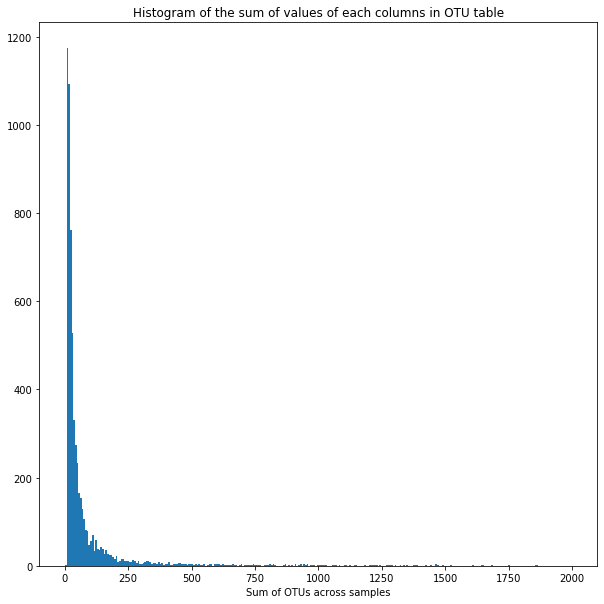

In [786]:
fig11 = plt.figure(figsize=(10,10))
plt.hist(list(df.sum()[1:]), bins=300, range=[0,2000])
plt.xlabel('Sum of OTUs across samples')
plt.title('Histogram of the sum of values of each columns in OTU table')
plt.show()
fig11.savefig('Histogram_OTU.png')

In [769]:
df2=df2.drop(columns=df2.columns[0])

In [833]:
data=df2[df2.columns[1:-2]]

In [672]:
data.max()

OTU000001     18
OTU000002    620
OTU000003      2
OTU000004      7
OTU000006    107
            ... 
OTU059940      0
OTU059941      0
OTU059970      0
OTU059975      0
OTU059979      0
Length: 17544, dtype: int64

In [1031]:
relative_data

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0002933]])

In [1028]:
data

,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,OTU000325,...,OTU003709,OTU000317,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,8.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,2.0,15.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,3.0,0.0,0.0,0.0
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,151.0,62.0,0.0,0.0,0.0,0.0,0.0
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [792]:
fdf1=((data-data.min())/(data.max()-data.min()))
# .dropna(axis=1)
# fdf2=((data-data.min())/(data.max()-data.min())).dropna(axis=1)


In [793]:
fdf1

,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,OTU000325,...,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017,Unnamed: 6259,Unnamed: 6260
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002545,0.006993,0.008621,0.000,0.0,0.0,0.000000,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.026940,0.000,0.0,0.0,0.000000,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002545,0.002331,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020356,0.004662,0.016164,0.000,0.0,0.0,0.005005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.053613,0.000000,0.003,0.0,0.0,0.000000,NaN,NaN
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.384224,0.144522,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.002155,0.000,0.0,0.0,0.000000,NaN,NaN


In [680]:
data['OTU043340'].max()

0

In [794]:
fdf1.to_csv('Normalized_OTU_Updated.csv', index=False)

In [797]:
dff=pd.read_csv('Normalized_OTU_Updated.csv')

In [124]:
dff['samples']=df2.samples

In [805]:
dff=dff[dff.columns[:-2]]

In [822]:
dff

,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,OTU000325,...,OTU003709,OTU000317,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002545,0.006993,0.008621,0.000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.026940,0.000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002545,0.002331,0.000000,0.000,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020356,0.004662,0.016164,0.000,0.0,0.0,0.005005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.053613,0.000000,0.003,0.0,0.0,0.000000
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.384224,0.144522,0.000000,0.000,0.0,0.0,0.000000
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.002155,0.000,0.0,0.0,0.000000


In [160]:
fdf.insert (0, "samples", df2['samples'])

In [162]:
fdf

,samples,OTU000001,OTU000002,OTU000003,OTU000004,OTU000006,OTU000007,OTU000008,OTU000009,OTU000010,...,OTU048280,OTU048290,OTU048295,OTU048299,OTU048322,OTU048333,OTU048335,OTU048346,OTU048350,OTU048354
0,ERR1306253,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,ERR1306176,0.0,0.003226,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,ERR1306087,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,ERR1306170,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ERR1306014,0.0,0.000000,0.0,0.0,0.009346,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,894.YY965.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0
250,963.Iguana.78.051611.LAB.vial.661,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
251,894.SV1770.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0
252,894.GV998.lane5.NoIndex.L005,0.0,0.080645,0.0,0.0,0.028037,0.0,0.0,0.010526,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0


In [217]:
d2=df2[df2.columns[1:]].T
d2=d2.reset_index()
d2[d2.columns[1:]]

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,2,...,29,0,0,0,0,0,0,0,50,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1035]:
def Variance_vs_CP(data,plotname):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    print(data.head())
    pca = PCA().fit(data)
    print("'cumulative explained variance'",len(np.cumsum(pca.explained_variance_ratio_)))
    fig = plt.figure(figsize=(13,13))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title(plotname)
    fig.savefig('PCA_of_Normalized_OTU.png')

In [818]:
def Variance_vs_CP2(data,plotname):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    print(data.head())
    pca = SparsePCA().fit(data)
    print("'cumulative explained variance'",len(np.cumsum(pca.explained_variance_ratio_)))
    fig = plt.figure(figsize=(13,13))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title(plotname)
    plt.show()
    fig.savefig('PCA_of_OTU.png')

   OTU000049  OTU000083  OTU000111  OTU000207  OTU000252  OTU000253  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   OTU000263  OTU000286  OTU000320  OTU000325  ...  OTU003709  OTU000317  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        0.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   OTU001601  OTU000275  OTU000233  OTU000077  OTU001656  OTU000013  \
0        0.0   0.000000   0.000000   0.000000

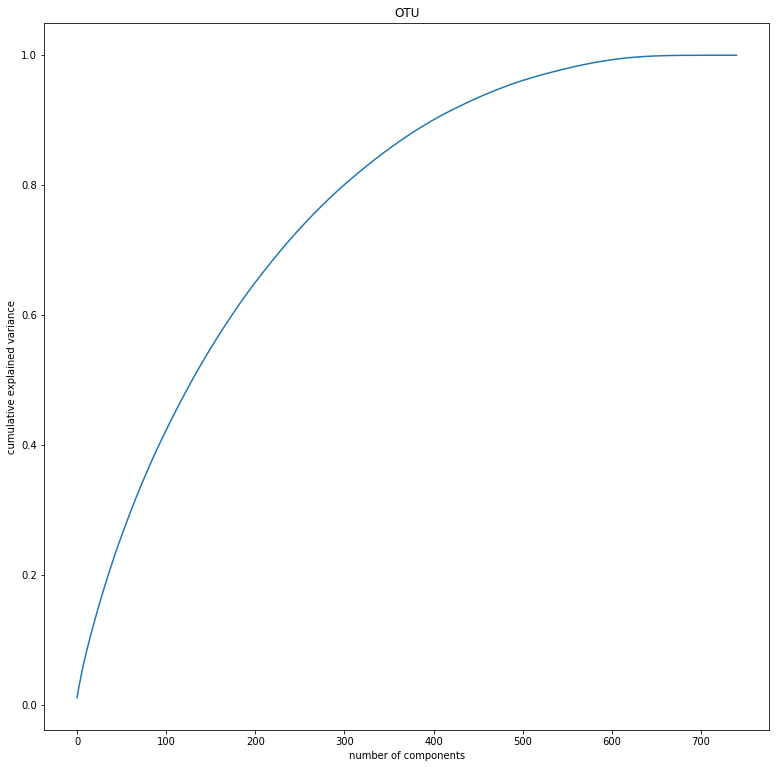

In [1094]:
Variance_vs_CP(relative_data,"OTU")

In [1034]:
def PCA_processing(data):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    data

    pca = PCA()
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents)
#                  , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
    principalDf

#     CP1= principalDf["principal component 1"].values.tolist()
#     CP2= principalDf["principal component 2"].values.tolist()
#     CP3= principalDf["principal component 3"].values.tolist()
    return principalDf

In [1037]:
pca_data=PCA_processing(relative_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,...,731,732,733,734,735,736,737,738,739,740
0,-0.005488,-0.010184,-0.003641,-0.004435,-0.001840,-0.001075,-0.011282,-0.000116,-0.010918,-0.002746,...,-2.576604e-09,7.972036e-10,-1.622751e-09,1.904810e-10,-8.296849e-10,-2.163907e-10,-1.564776e-12,-2.141003e-13,-2.815999e-15,2.383064e-16
1,-0.005523,-0.010291,-0.003684,-0.004489,-0.001867,-0.001094,-0.011451,-0.000099,-0.011111,-0.002803,...,-9.083891e-11,-1.317447e-09,1.145838e-09,3.214998e-10,4.569726e-12,4.332730e-11,1.569728e-12,1.015213e-13,1.333023e-15,2.383064e-16
2,-0.006889,-0.014575,-0.005414,-0.007055,-0.003116,-0.002223,-0.017487,0.006248,-0.012921,-0.004977,...,-1.955021e-10,9.394084e-12,3.455434e-11,-1.088191e-11,4.116665e-11,-5.850420e-12,2.513697e-14,4.611844e-14,-1.956970e-16,2.383064e-16
3,-0.005922,-0.011358,-0.004096,-0.005067,-0.002130,-0.001317,-0.012697,-0.000298,-0.011128,-0.003116,...,-1.011129e-10,-8.945745e-11,3.852677e-11,1.124423e-11,1.771358e-11,-5.885476e-12,6.094371e-14,3.690840e-15,3.303640e-17,2.383064e-16
4,-0.011117,-0.032350,-0.013194,-0.019855,-0.010186,-0.009383,-0.063479,0.174058,0.061070,-0.014141,...,-1.181260e-11,2.909160e-12,1.421844e-11,-1.029510e-11,-3.913283e-12,-4.456157e-12,-8.305151e-16,7.157814e-16,-1.467199e-18,2.383064e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,-0.005959,-0.011622,-0.004214,-0.005105,-0.002208,-0.001328,-0.013708,0.000113,-0.013490,-0.003569,...,-5.585087e-10,-4.805133e-10,-3.462688e-11,3.141617e-10,-2.576153e-10,5.160005e-11,3.941938e-14,1.021721e-14,-1.427283e-17,2.383064e-16
737,-0.006212,-0.012318,-0.004483,-0.005558,-0.002383,-0.001440,-0.015326,0.005327,-0.011412,-0.003642,...,-9.836366e-10,-7.268878e-10,-5.105431e-10,1.622136e-09,-1.957015e-11,-3.404730e-10,4.094337e-13,-1.241213e-14,-4.023858e-16,2.383064e-16
738,-0.007232,-0.015574,-0.005799,-0.007534,-0.003309,-0.002230,-0.019624,-0.001533,-0.018373,-0.005815,...,-3.568210e-11,-5.707907e-12,1.633386e-11,8.749757e-12,-2.268223e-11,-1.772886e-12,6.557086e-14,-3.790580e-15,-2.973756e-17,2.383064e-16
739,-0.007597,-0.017024,-0.006416,-0.008513,-0.003809,-0.002735,-0.021313,-0.001793,-0.022018,-0.007040,...,-1.345655e-10,-1.910707e-11,-4.042054e-11,1.767519e-11,-3.823930e-11,-1.847836e-12,1.055480e-14,-1.156701e-15,-6.118275e-17,2.383064e-16


In [658]:
np.sqrt(pca_data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,NaN,NaN,0.420982,NaN,NaN,0.148296,NaN,NaN,NaN,NaN,...,0.160124,0.052460,0.086651,NaN,0.400589,NaN,0.919701,0.074361,0.043684,5.351505e-08
1,NaN,NaN,0.430229,NaN,NaN,0.151032,NaN,NaN,NaN,NaN,...,NaN,NaN,0.032318,0.076720,NaN,0.035273,NaN,NaN,NaN,5.351505e-08
2,NaN,NaN,0.459823,NaN,NaN,0.143101,NaN,NaN,NaN,NaN,...,NaN,NaN,0.018006,0.012790,NaN,0.005350,NaN,0.004012,NaN,5.351505e-08
3,NaN,NaN,0.426132,NaN,NaN,0.150220,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005390,0.041960,NaN,0.018640,NaN,NaN,0.017603,5.351505e-08
4,NaN,NaN,0.491374,NaN,NaN,0.140561,0.027591,NaN,NaN,NaN,...,NaN,0.021895,NaN,0.015881,0.009267,NaN,0.031271,0.013891,0.004594,5.351505e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,NaN,0.942524,NaN,2.854572,NaN,0.315401,0.144570,0.106974,0.074656,...,NaN,NaN,0.010320,0.006233,NaN,0.001892,NaN,0.002530,NaN,5.351505e-08
250,NaN,NaN,0.571876,NaN,NaN,0.153210,NaN,NaN,NaN,NaN,...,NaN,NaN,0.007989,0.007990,NaN,0.002890,NaN,0.004080,NaN,5.351505e-08
251,NaN,NaN,0.903538,NaN,3.156155,NaN,0.349762,NaN,0.575886,0.465588,...,NaN,NaN,0.005069,0.005250,NaN,0.002165,NaN,0.003396,0.006898,5.351505e-08
252,0.670715,1.027360,0.490625,NaN,NaN,0.564811,NaN,NaN,NaN,0.101492,...,0.021969,NaN,0.029186,0.006446,NaN,0.003016,NaN,0.004483,NaN,5.351505e-08


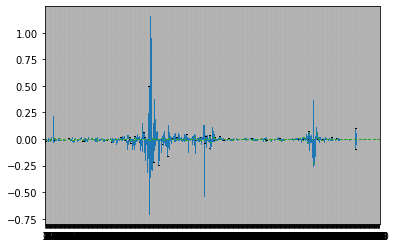

In [1095]:
bic_list = []
labels = []
for n in range(1,10):
        
        pcs= relative_data[relative_data.columns[:600]]
        models = GMM(n_components = n).fit(pcs)
        print(models.means_)
        bic_list.append(models.bic(pcs))
        labels.append(models.predict(pcs))

[[0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.

[[0.0013624  0.00122616 0.0013624  ... 0.0013624  0.0013624  0.0013624 ]
 [0.         0.05       0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.0013624  0.0013624  0.0013624  ... 0.00012385 0.0013624  0.0013624 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00136426 0.00136426 ... 

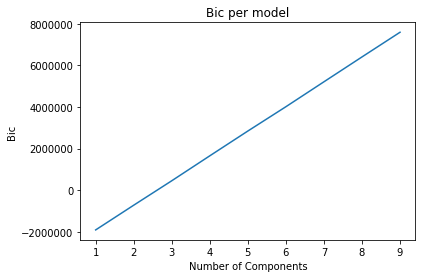

In [1096]:
fig2 = plt.figure(1)
plt.plot(range(1,10),bic_list)
plt.xlabel("Number of Components")
plt.ylabel("Bic")
plt.title("Bic per model")
plt.show()
fig2.savefig('bic.png')

In [ ]:
labels[4]
df2['class']=labels[4]
df2.to_csv('Clusterd_OTU.csv', index=False)

In [982]:
df2.drop(df2.columns[1:len(df2.columns)-1], axis=1).to_csv('Clusterd_OTU.csv', index=False)

In [983]:
pcs= pca_data[pca_data.columns[:100]]

In [928]:
models = GMM(n_components =6 ).fit(pcs)
labels=models.predict(pcs)

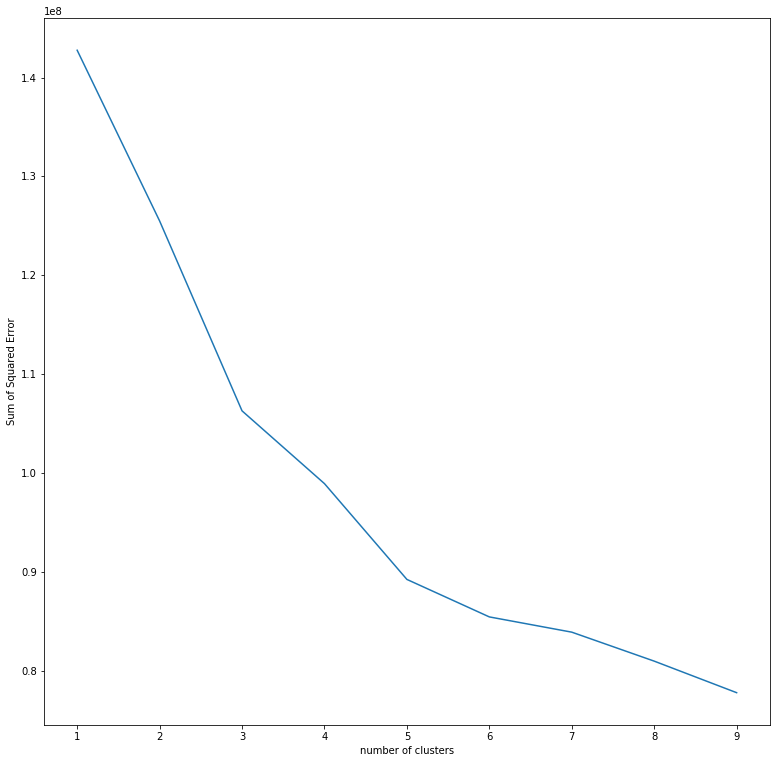

In [1001]:
sse_set = []
for ii in range(1,10):
    cls = KMeans(n_clusters=ii).fit(pcs)
    sse_set.append(cls.inertia_)
fig9 = plt.figure(figsize=(13,13))
plt.plot(range(1,10),sse_set)
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Error');
plt.show()
fig9.savefig('kmeans')    

In [662]:
cls = KMeans(n_clusters=6).fit(pca_data[pca_data.columns[0:5]])


In [474]:
cls=DBSCAN().fit(pca_data)
labels=cls.labels_    

In [929]:
color_num = {0: "#7b3294", 1: "#008837", 2: "#c2a5cf", 3: "#a6dba0", 4:"yellow",5:'green',6:'orange',7:'brown',8:'grey'}

In [961]:
color_set = [color_num[num] for num in labels[4]]

<Figure size 432x288 with 0 Axes>

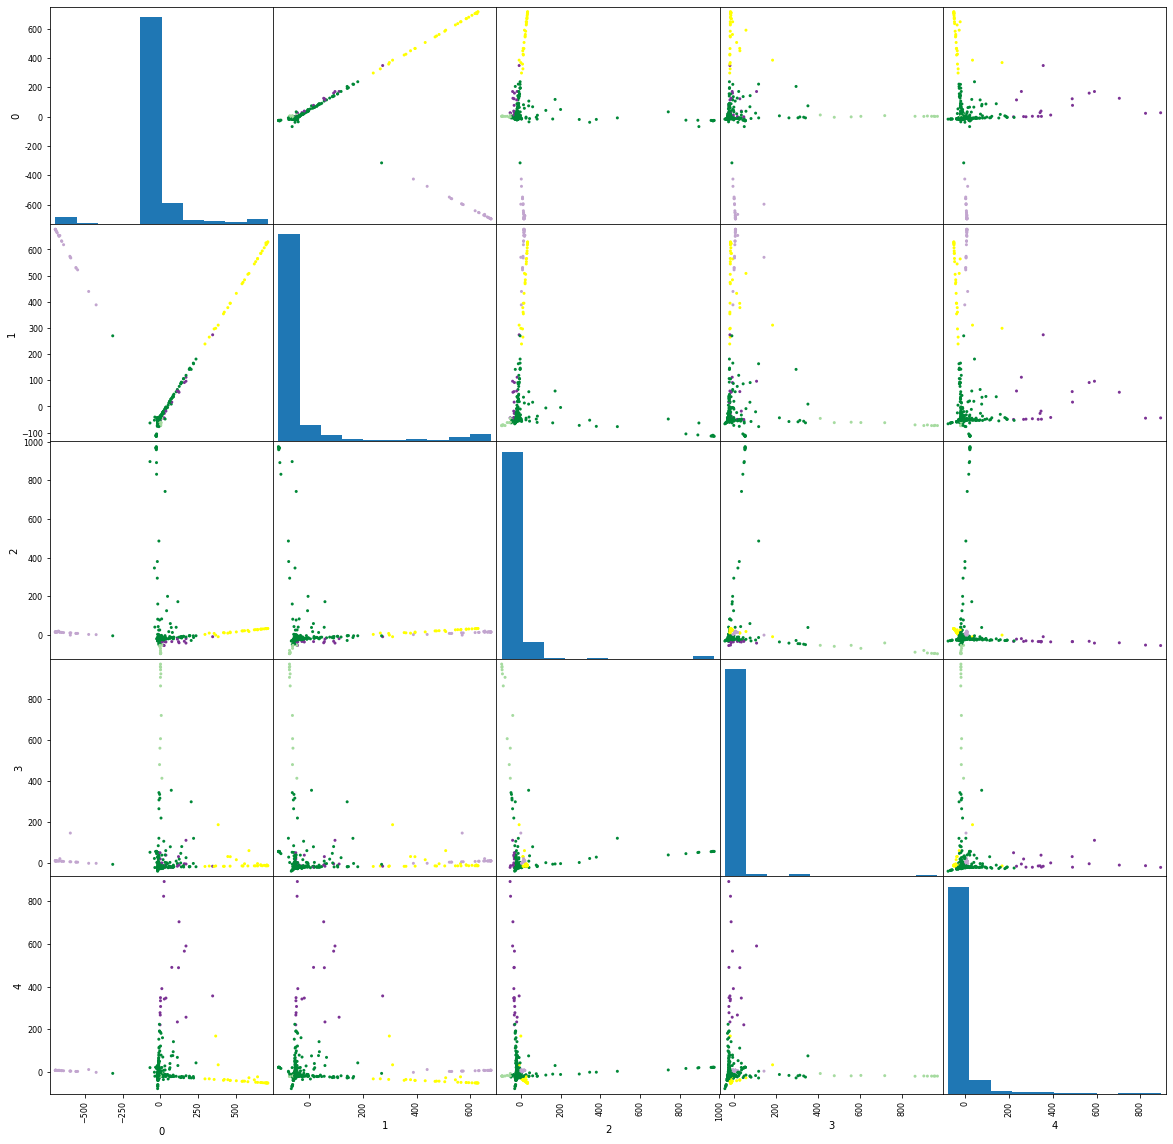

In [963]:
fig99 = plt.figure()
savefi=scatter_matrix(pca_data[pca_data.columns[:5]], alpha=1, figsize=(20,20) ,c=color_set)
# labels=["Label A", "Label B", "Label C"]
# plt.legend(savefi, [str(i) for i in range(5)], loc=(1.02,0))
plt.show()
fig99.savefig('scatter_matrix_pca')

In [486]:
cls.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [1101]:
meta_data = pd.read_csv('PAMclusters_new.csv')

In [1102]:
meta_data

,id,species,order,digestive_habitat_type,diet,surrounding_habitat,category
0,MVB2015-2006,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
1,MVB2015-2008,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
2,MVB2015-2010,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
3,MVB2015-2012,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
4,MVB2015-2024,dendropsophus minutus,anura,intestine,carnivore,freshwater,1
...,...,...,...,...,...,...,...
736,ERR1720546,durbania amakosa,lepidoptera,intestine,herbivore,terrestrial,5
737,ERR1720547,durbania amakosa,lepidoptera,stomach,herbivore,terrestrial,5
738,ERR1720548,durbania amakosa,lepidoptera,stomach,herbivore,terrestrial,5
739,ERR1720549,durbania amakosa,lepidoptera,stomach,herbivore,terrestrial,5


In [1112]:
bio_mass = pd.read_csv('metadata_bodyweight.csv')

In [1115]:
bio_mass[bio_mass.columns[1:]]

,cluster,bodymass,host_scientific_name,digestive_habitat_type,diet,surrounding_habitat,country,host_order,host_kingdom,host_phylum,...,Bio15_2_5min,Bio16_2_5min,Bio17_2_5min,Bio18_2_5min,Bio19_2_5min,Vegetation_density,terrain_complexity,NDVI_Modis_1_mar.2018,Immune_Complexity_Ordinal,Immune_Complexity_Binary
0,1,small,anser indicus,fecal,herbivore,terrestrial,tibet,anseriformes,animalia,chordata,...,132.262657,296.800000,6.000000,294.000000,6.000000,0.0,27502.500000,73,9,Adaptive
1,1,small,anser indicus,fecal,herbivore,terrestrial,tibet,anseriformes,animalia,chordata,...,132.262657,296.800000,6.000000,294.000000,6.000000,0.0,27502.500000,73,9,Adaptive
2,1,small,anser indicus,fecal,herbivore,terrestrial,tibet,anseriformes,animalia,chordata,...,141.989489,294.000000,2.640000,294.000000,2.640000,0.0,14950.799800,60,9,Adaptive
3,1,small,anser indicus,fecal,herbivore,terrestrial,tibet,anseriformes,animalia,chordata,...,141.989489,294.000000,2.640000,294.000000,2.640000,0.0,14950.799800,60,9,Adaptive
4,1,small,anser indicus,fecal,herbivore,terrestrial,tibet,anseriformes,animalia,chordata,...,125.556120,281.880000,3.000000,281.880000,3.000000,0.0,85892.398440,57,9,Adaptive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2,large,ursus americanus americanus,fecal,omnivore,terrestrial,usa,carnivora,animalia,chordata,...,66.269265,255.744960,42.915561,255.744960,42.915561,0.0,6.888890,33,9,Adaptive
263,2,large,ursus americanus americanus,fecal,omnivore,terrestrial,usa,carnivora,animalia,chordata,...,64.060271,261.684032,44.172032,261.684032,44.172032,0.0,3.506170,28,9,Adaptive
264,2,large,ursus americanus americanus,fecal,omnivore,terrestrial,usa,carnivora,animalia,chordata,...,64.063105,261.676444,44.167564,261.676444,44.167564,0.0,3.506170,28,9,Adaptive
265,2,large,ursus americanus americanus,fecal,omnivore,terrestrial,usa,carnivora,animalia,chordata,...,64.240772,239.469520,43.000000,239.469520,43.000000,0.0,18.246901,28,9,Adaptive


In [1135]:
quantitative=bio_mass[['PD_whole_tree','Bio12_2_5min','Bio13_2_5min','Bio14_2_5min','Bio15_2_5min','Bio16_2_5min','Bio17_2_5min','Bio18_2_5min','Bio19_2_5min','Vegetation_density','terrain_complexity','NDVI_Modis_1_mar.2018','Immune_Complexity_Ordinal']]

In [1136]:
quantitative= quantitative.fillna(quantitative.mean())

In [1137]:
quantitative

,PD_whole_tree,Bio12_2_5min,Bio13_2_5min,Bio14_2_5min,Bio15_2_5min,Bio16_2_5min,Bio17_2_5min,Bio18_2_5min,Bio19_2_5min,Vegetation_density,terrain_complexity,NDVI_Modis_1_mar.2018,Immune_Complexity_Ordinal
0,13.32986,398.000000,129.600000,1.000000,132.262657,296.800000,6.000000,294.000000,6.000000,0.0,27502.500000,73,9
1,13.18811,398.000000,129.600000,1.000000,132.262657,296.800000,6.000000,294.000000,6.000000,0.0,27502.500000,73,9
2,13.99880,375.920000,128.120000,0.640000,141.989489,294.000000,2.640000,294.000000,2.640000,0.0,14950.799800,60,9
3,13.33633,375.920000,128.120000,0.640000,141.989489,294.000000,2.640000,294.000000,2.640000,0.0,14950.799800,60,9
4,13.40210,390.480000,111.200000,1.000000,125.556120,281.880000,3.000000,281.880000,3.000000,0.0,85892.398440,57,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,12.19983,536.065924,95.372480,10.915561,66.269265,255.744960,42.915561,255.744960,42.915561,0.0,6.888890,33,9
263,19.87397,560.564096,93.324032,10.836032,64.060271,261.684032,44.172032,261.684032,44.172032,0.0,3.506170,28,9
264,13.43467,560.538212,93.329404,10.838284,64.063105,261.676444,44.167564,261.676444,44.167564,0.0,3.506170,28,9
265,19.58361,516.541319,92.329141,11.000000,64.240772,239.469520,43.000000,239.469520,43.000000,0.0,18.246901,28,9


In [1138]:
fs=SelectKBest(chi2, k=4).fit_transform(quantitative, bio_mass['cluster'])

In [1140]:
fs

array([[3.98000000e+02, 6.00000000e+00, 2.94000000e+02, 2.75025000e+04],
       [3.98000000e+02, 6.00000000e+00, 2.94000000e+02, 2.75025000e+04],
       [3.75920000e+02, 2.64000000e+00, 2.94000000e+02, 1.49507998e+04],
       ...,
       [5.60538212e+02, 4.41675640e+01, 2.61676444e+02, 3.50617000e+00],
       [5.16541319e+02, 4.30000000e+01, 2.39469520e+02, 1.82469006e+01],
       [5.16541319e+02, 4.30000000e+01, 2.39469520e+02, 1.82469006e+01]])

In [1164]:
 kb = fs.SelectKBest(k='all')

 kb.fit(quantitative, bio_mass['cluster'])

 names = quantitative.columns.values[kb.get_support()]

 scores = kb.scores_[kb.get_support()]
 pvalue = kb.pvalues_[kb.get_support()]

 names_scores = list(zip(names, scores,pvalue))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Feat_names','F_Scores','PValue'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending =

  [False, True])

 print(ns_df_sorted)

                   Feat_names   F_Scores    PValue
0               PD_whole_tree  10.658016  0.000001
11      NDVI_Modis_1_mar.2018   9.467104  0.000006
7                Bio18_2_5min   7.970164  0.000042
4                Bio15_2_5min   5.181366  0.001708
10         terrain_complexity   4.207909  0.006265
3                Bio14_2_5min   3.938654  0.008969
6                Bio17_2_5min   3.390255  0.018584
9          Vegetation_density   3.259138  0.022106
1                Bio12_2_5min   2.175193  0.091328
2                Bio13_2_5min   1.968573  0.119065
8                Bio19_2_5min   1.359422  0.255624
5                Bio16_2_5min   1.066588  0.363757
12  Immune_Complexity_Ordinal   0.499993  0.682604


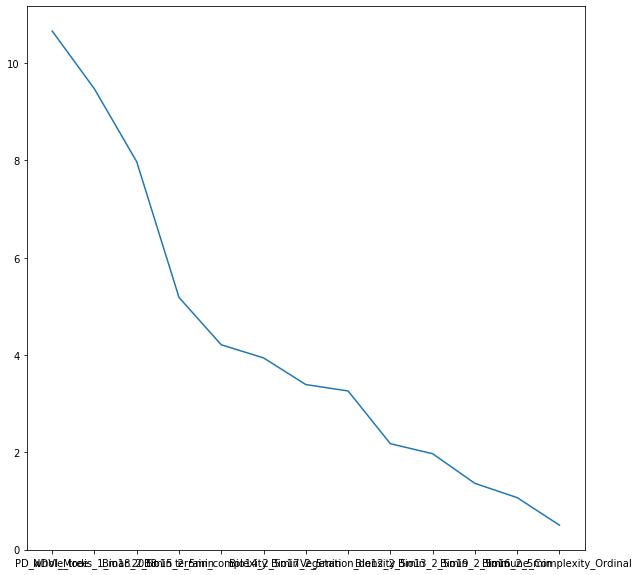

In [1149]:
fig11 = plt.figure(figsize=(10,10))
plt.plot(ns_df_sorted[ns_df_sorted.columns[0]],ns_df_sorted[ns_df_sorted.columns[1]])
plt.show()

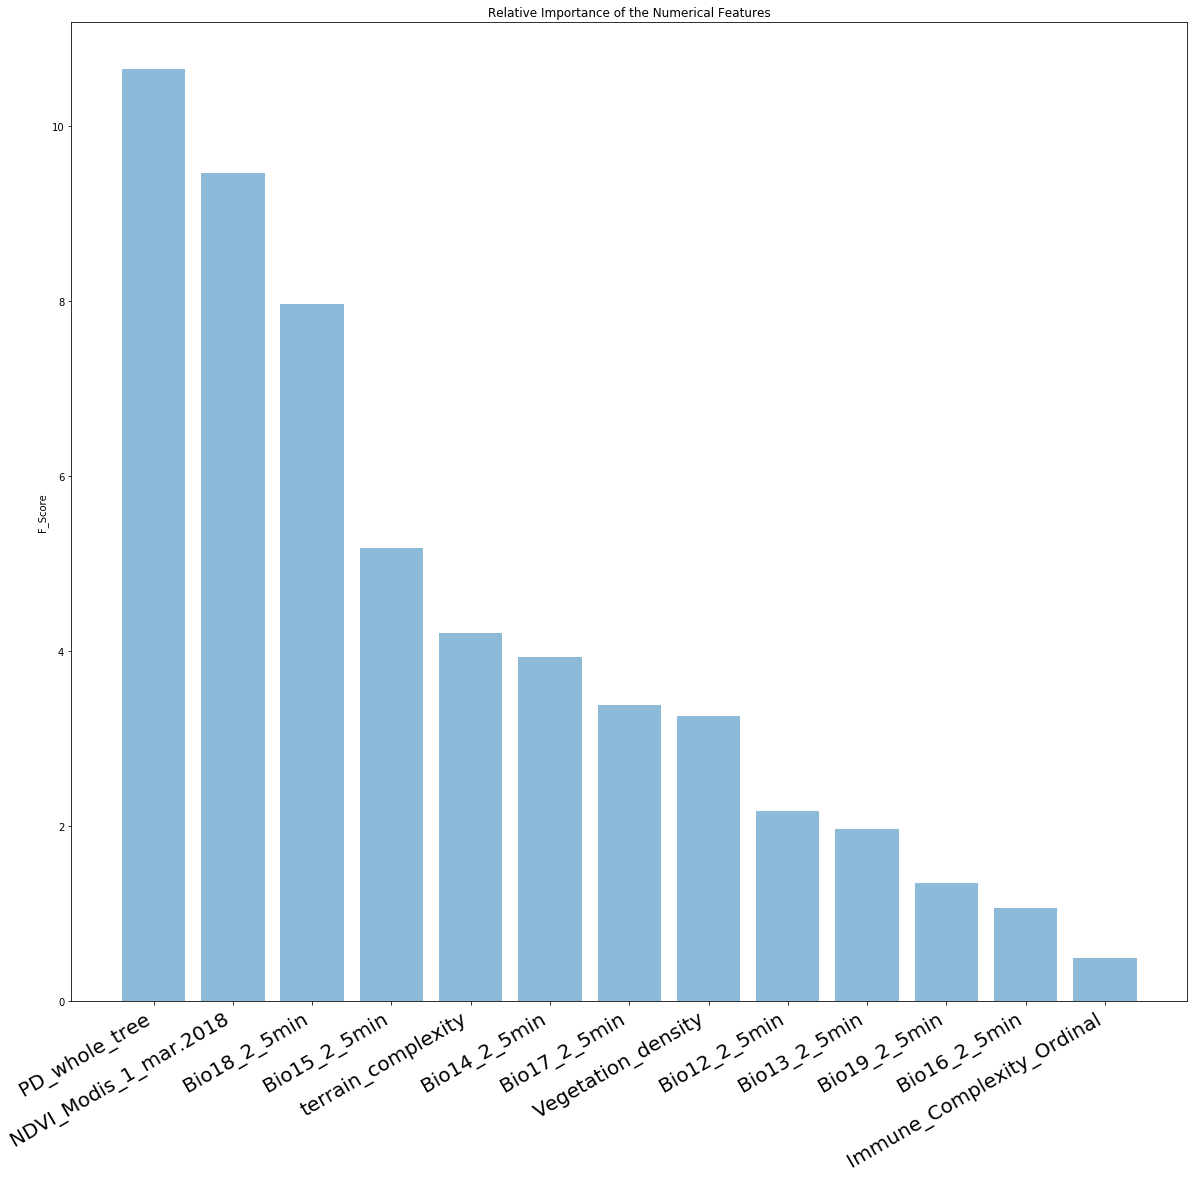

In [1162]:
fig11 = plt.figure(figsize=(20,20))
objects = ns_df_sorted[ns_df_sorted.columns[0]]
y_pos = np.arange(len(objects))
performance = ns_df_sorted[ns_df_sorted.columns[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.tick_params(axis="x", labelsize=20)
plt.ylabel('F_Score')
plt.title('Relative Importance of the Numerical Features')
fig11.autofmt_xdate()
plt.show()

fig11.savefig('Feature_Importance.png')